# ECON526: Midterm Practice

## Student Name/Number: (doubleclick to edit)

This is an **ungraded** practice for editing and submitting the online
exam.

### Instructions

-   Ensure you modify the field with your **name and student number
    above immediately**
-   **Execute the file** to begin, which will also check your setup. To
    do this in Jupyter, in the menu go `> Run > Run All Cells` or the
    equivalent buttons
-   Edit this file directly, and in-place as an `ipynb` file, which we
    will automatically download at the end of the exam time directly. -
    In particular
    -   **DO NOT** rename this file with your name. It is automatically
        associated with your canvas account
    -   **DO NOT** save-as the file, move it, or export to pdf or html
    -   **DO NOT** add any additional packages
-   **Save** the notebook as you are working.
    -   We will only grade what is saved at the end of the exam in this
        exact file, and it is your responsibility to ensure the file is
        saved
    -   We will **not** execute the notebook, so ensure all code,
        figures, etc. are ready as-is upon saving for submission
-   Ensure you **edit the results in the code blocks or markup blocks
    indicated** as we will not grade anything outside of those
    -   You will not be judged on code quality directly, but code
        clarity may be required for us to ensure you understood the
        problem directly
    -   If a question requires math, you can try to put latex inside of
        the cells but will not be judged on whether you write latex
        vs. math in text that doesn’t quite match latex. But it should
        be clear
-   The exam is **closed book** except for a **one page cheat-sheet**
    with anything on it.
-   Accessing the internet **is not permitted**, though feel free to use
    the internal help in Jupyter.

In [1]:
# Packages available. DO NOT MODIFY
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from numpy.linalg import cond, matrix_rank, norm
from scipy.linalg import inv, solve, det, eig, lu, eigvals
from sklearn.metrics import confusion_matrix

# Question 1

Take the following model from our problem set, and modify it so that the
generated data has circles which overlap so the data isn’t fully
separated

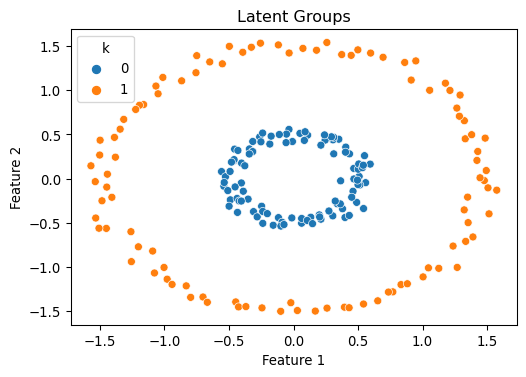

In [2]:
# MODIFY CODE HERE
def generate_noisy_circle(radius, num_points, noise_std):
    theta = np.linspace(0, 2*np.pi, num_points)
    x = radius * np.cos(theta) + np.random.normal(0, noise_std, num_points)
    y = radius * np.sin(theta) + np.random.normal(0, noise_std, num_points)
    return np.column_stack((x, y))

# Generate data for inner and outer circles
X_1 = generate_noisy_circle(0.5, 100, 0.05)
X_2 = generate_noisy_circle(1.5, 100, 0.05)

# Create dataframes
df_1 = pd.DataFrame({"f1": X_1[:, 0], "f2": X_1[:, 1], "k": 0})
df_2 = pd.DataFrame({"f1": X_2[:, 0], "f2": X_2[:, 1], "k": 1})
df = pd.concat([df_1, df_2], ignore_index=True)
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=df, x="f1", y="f2", hue="k", ax=ax)
ax.set(xlabel="Feature 1", ylabel="Feature 2", title="Latent Groups")
plt.show()

Given the above code, the following should provide the confusion matrix
without modification

/Users/jlperla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


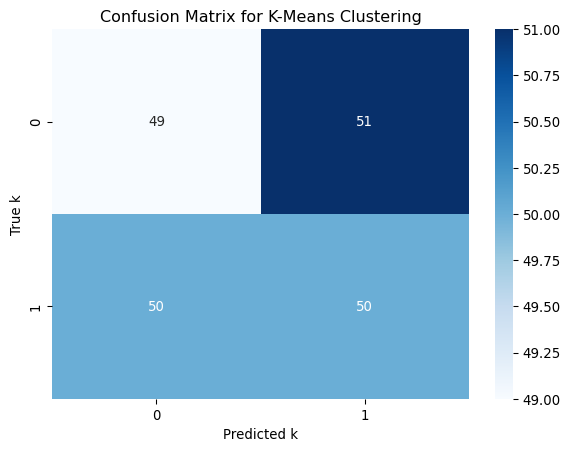

In [3]:
# DO NOT MODIFY
kmeans = KMeans(n_clusters=2, random_state=0)
df["k_hat"] = kmeans.fit_predict(df[["f1", "f2"]])

# Create confusion matrix
cm = confusion_matrix(df["k"], df["k_hat"])

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted k')
plt.ylabel('True k')
plt.title('Confusion Matrix for K-Means Clustering')
plt.show()

Did the performance of the k-means clustering get better, worse, or the
same? Briefly explain, referring to math if possible

**(double click to add an explanation here)**

# Question 2

Here is code that generates a matrix and runs linear least squares

In [5]:
# DO NOT MODIFY
X = np.array([[1.0, 2.0],
              [0.5, 3.1],
              [1.2, 1.0]])
y = np.array([1.0, 2.0, 3.0])
beta_hat, residuals, rank, s = scipy.linalg.lstsq(X, y)
print(f"beta_hat = {beta_hat}")

beta_hat = [1.70960187 0.21077283]

## Question 2.1

What optimization problem is the least squares problem solving? Also,
what are the **normal equations** which provides an equivalent way to
solve this problem in many cases?

**(double click to add an explanation here)**

## Question 2.2

Write code to solve the least squares problem using the normal equations
from the previous part. Modify the code below which has a template for
using solve. Compare your results to the `beta_hat` from above.

In [7]:
# MODIFY CODE HERE
# Below is a template for solve to replace with your own matrices
beta_hat_solve = solve(np.array([[1.0, 0.0],[0.0, 1.0]]), np.array([1.0, 1.0]))
print(f"beta_hat_solve = {beta_hat_solve}, beta_hat = {beta_hat}")

beta_hat_solve = [1. 1.], beta_hat = [1.70960187 0.21077283]

**(double click to add an explanation here)**

## Question 2.3

Modify the original $X$ matrix to make it a 3x3 matrix but one that
still have a rank of $2$. Check the rank in the code to verify.

In [9]:
# MODIFY CODE HERE
# Template for the matrix rank function provided
matrix_rank(np.array([[1.0, 0.0], [0.0, 1.0]]))

2

Can you use the normal equations to solve for the new least squares
problem using your modified $X$ (and the old $y$)? Why or why not?

**(double click to add an explanation here)**

# Question 3

Take the following code from our implementation of the Solow model
dynamics

$$
k_{t+1} = s A k_t^{\alpha} + (1-\delta) k_t \equiv g(k_t)\quad \text{ given }k_0
$$

k_star = 1.7846741842265788

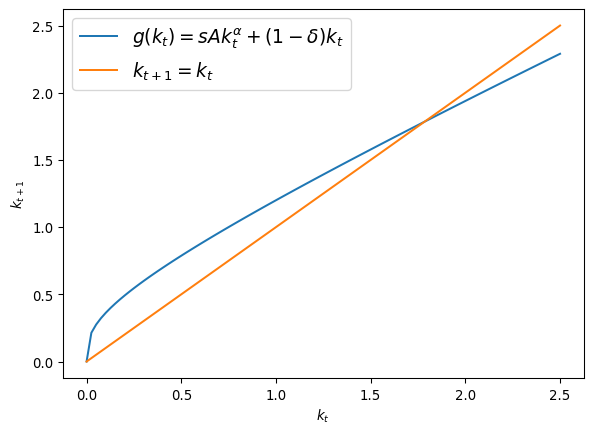

In [11]:
# DO NOT MODIFY
def plot_45(g, k_grid):
  fig, ax = plt.subplots()
  ax.plot(k_grid, g(k_grid), label=r"$g(k_t) = s A k_t^{\alpha} + (1-\delta)k_t $")
  ax.plot(k_grid, k_grid, label=r"$k_{t+1}=k_t$")
  ax.set_xlabel(r"$k_t$")
  ax.set_ylabel(r"$k_{t+1}$")
  ax.legend(loc='upper left', fontsize=14)
  return plt
def simulate(f, X_0, T):
    X = np.zeros((1, T+1))
    X[:,0] = X_0
    for t in range(T):
        X[:,t+1] = f(X[:,t])
    return X

# This example
A, s, alpha, delta = 2, 0.3, 0.3, 0.4
def g(k):
    return s*A*k**alpha + (1-delta)*k    
k_star = (s*A/delta)**(1/(1-alpha))
print(f"k_star = {k_star}")
k_grid = np.linspace(0, 2.5, 100)
plt = plot_45(g, k_grid)

## Question 3.1

There are fixed points here at $k=0$ and the $k^*$. Explain how you
would check if something is a fixed point to verify those guesses - no
need to write the code.

**(double click to add an explanation here)**

## Question 3.2

The two fixed points have different properties for whether they are
stable or not. Explain what stability means and how you would check if
they are stable given properties of the $g(\cdot)$ function evaluated at
the steady states? Write code to verify this if you can.

**(double click to add an explanation here)**

In [12]:
# MODIFY CODE HERE TO VERIFY YOUR ANSWER

## Question 3.3

The following code simulates from a $k_0$:

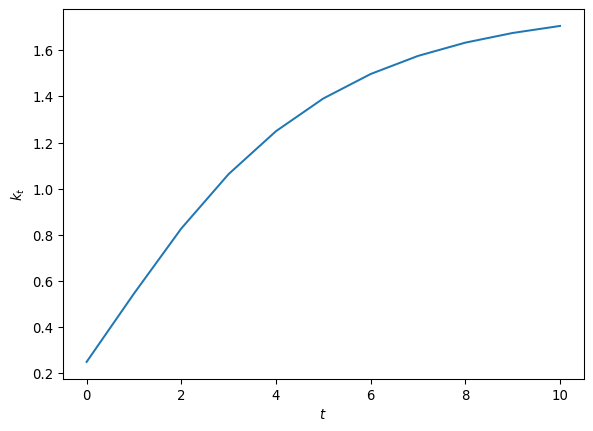

In [14]:
# DO NOT MODIFY
A, s, alpha, delta = 2, 0.3, 0.3, 0.4
def g(k):
    return s*A*k**alpha + (1-delta)*k    
k_0 = np.array([0.25])
T = 10
k_sim = simulate(g, k_0, T) # use with our g
fig, ax = plt.subplots()
ax.plot(range(T+1), k_sim.T, label=r"$k_t$ from $k_0 = 0.25$")
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$k_t$")
plt.show()

Now, modify this code - copied for your convenience - so the
$\alpha = 0.999$ and plot those dynamics.

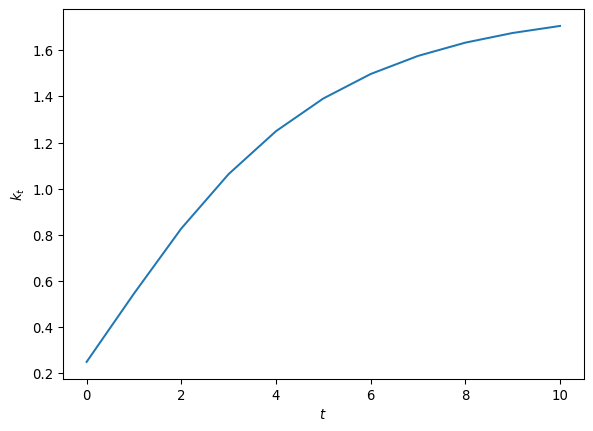

In [15]:
# MODIFY CODE HERE
A, s, alpha, delta = 2, 0.3, 0.3, 0.4
def g(k):
    return s*A*k**alpha + (1-delta)*k    
k_0 = np.array([0.25])
T = 10
k_sim = simulate(g, k_0, T) # use with our g
fig, ax = plt.subplots()
ax.plot(range(T+1), k_sim.T, label=r"$k_t$ from $k_0 = 0.25$")
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$k_t$")
plt.show()

Comparing the two examples, explain the difference and interpret in
terms of the fixed points. Feel free to relate to the previous section.

**(double click to add an explanation here)**

# Question 4

Consider a joint probability distribution of two discrete random
variables $X$ and $Y$. Let $X \in \{0, 1\}$ and $Y \in \{0, 1, 2\}$.

## Question 4.1

Something isn’t quite right with the PMF below. Figure out what the
issue is and fix it within the $P$ matrix below, modifying the code
directly. Make whatever change you wish, but make it clear what the
issue was.

In [17]:
# MODIFY CODE HERE
P = np.array([[0.2, 0.3, 0.1],
              [0.3, 0.1, 0.1]])

## Question 4.2

Using your new PMF of $\mathbb{P}(X, Y)$, calculate the marginal PMFs
for $X$ and $Y$, $\mathbb{P}(X)$ and $\mathbb{P}(Y)$. Hint:
`np.array([[1.0, 2.0], [3.0,4.0]]).sum(axis=0)` and `axis=1` are useful

In [19]:
# MODIFY CODE HERE

## Question 4.3

Define independence of two random variables, and write code to check if
$X$ and $Y$ are independent with your PMF using the definition.

**(double click to add an explanation here)**

Write code to verify whether your $X$ and $Y$ are independent for your
PMF.

In [21]:
# MODIFY CODE HERE

## Question 4.4

Using your PMF, calculate $\mathbb{E}[X\,|\,Y=1]$. Hint: You do not need
to calculate the conditional probability distribution for all $Y$ to do
this.

In [23]:
# MODIFY CODE HERE

## Question 5

Take the stochastic process

$$
X_{t+1} = X_t + a + \sigma \epsilon_{t+1}
$$ For $t=0, 1, \ldots, \infty$ and $\epsilon_{t+1} \sim N(0, 1)$ for
$X_0 = 0$ and an $a > 0$ and $\sigma > 0$ constants given in code below

# Question 5.1

What is the definition of a Markov Process? Is this Markov?

**(double click to add an explanation here)**

# Question 5.2

Take the following simulation

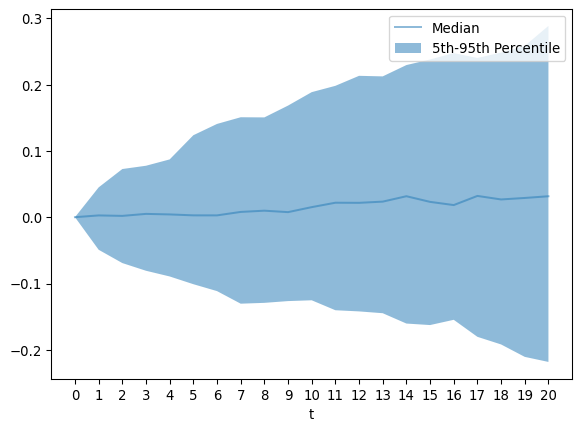

In [24]:
# DO NOT MODIFY
num_trajectories = 200
a = 0.001
sigma = 0.03
T = 20
X_0 = np.zeros(num_trajectories)

X = np.zeros((num_trajectories, T+1))
X[:, 0] = X_0
for t in range(1, T+1):
  X[:, t] = X[:, t-1] + a + sigma*np.random.randn(num_trajectories)
percentiles = np.percentile(X, [50, 5, 95], axis=0)
fig, ax = plt.subplots()
plt.plot(np.arange(T+1), percentiles[0,:], alpha=0.5, label='Median')
plt.fill_between(np.arange(T+1), percentiles[1,:], percentiles[2,:],
  alpha=0.5, label='5th-95th Percentile')
plt.xlabel('t')
ax.set_xticks(np.arange(T+1))
plt.legend()
plt.show()  

Define a **martingale** formally. Pretend that you did not know the
process above, and you were given just the plot of these trajectories.
How could use determine if something was a martingale using just data
along these lines. Is it enough if you had many trajectories, or would
you need something else?

**(double click to add an explanation here)**

## Question 5.3

Prove whether this process is or is not a martingale using your
definition

**(double click to add an explanation here)**